# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


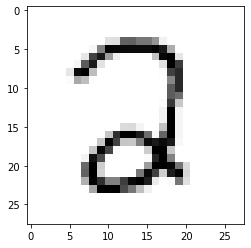

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2465
Training Accuracy: 0.6494, Testing Accuracy: 0.6568



Epoch 10, Loss 0.0962
Training Accuracy: 0.9145, Testing Accuracy: 0.9239



Epoch 20, Loss 0.0582
Training Accuracy: 0.9404, Testing Accuracy: 0.9461



Epoch 30, Loss 0.0451
Training Accuracy: 0.9520, Testing Accuracy: 0.9582



Epoch 40, Loss 0.0386
Training Accuracy: 0.9580, Testing Accuracy: 0.9622



Epoch 50, Loss 0.0348
Training Accuracy: 0.9617, Testing Accuracy: 0.9662



Epoch 60, Loss 0.0321
Training Accuracy: 0.9645, Testing Accuracy: 0.9662



Epoch 70, Loss 0.0301
Training Accuracy: 0.9662, Testing Accuracy: 0.9698



Epoch 80, Loss 0.0286
Training Accuracy: 0.9680, Testing Accuracy: 0.9698



Epoch 90, Loss 0.0273
Training Accuracy: 0.9695, Testing Accuracy: 0.9698



Epoch 100, Loss 0.0263
Training Accuracy: 0.9705, Testing Accuracy: 0.9703



Epoch 110, Loss 0.0254
Training Accuracy: 0.9716, Testing Accuracy: 0.9718



Epoch 120, Loss 0.0246
Training Accuracy: 0.9724, Testing Accuracy: 0.9728



Epoch 130, Loss 0.0238
Training Accuracy: 0.9733, Testing Accuracy: 0.9733



Epoch 140, Loss 0.0232
Training Accuracy: 0.9740, Testing Accuracy: 0.9738



Epoch 150, Loss 0.0226
Training Accuracy: 0.9746, Testing Accuracy: 0.9748



Epoch 160, Loss 0.022
Training Accuracy: 0.9750, Testing Accuracy: 0.9738



Epoch 170, Loss 0.0215
Training Accuracy: 0.9760, Testing Accuracy: 0.9738



Epoch 180, Loss 0.021
Training Accuracy: 0.9772, Testing Accuracy: 0.9733



Epoch 190, Loss 0.0206
Training Accuracy: 0.9776, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0201
Training Accuracy: 0.9784, Testing Accuracy: 0.9743



Epoch 210, Loss 0.0197
Training Accuracy: 0.9786, Testing Accuracy: 0.9743



Epoch 220, Loss 0.0193
Training Accuracy: 0.9791, Testing Accuracy: 0.9743



Epoch 230, Loss 0.019
Training Accuracy: 0.9796, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0186
Training Accuracy: 0.9802, Testing Accuracy: 0.9753



0.018092009518691506

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2541
Training Accuracy: 0.6313, Testing Accuracy: 0.6426



Epoch 10, Loss 0.1076
Training Accuracy: 0.8961, Testing Accuracy: 0.9118



Epoch 20, Loss 0.0821
Training Accuracy: 0.9210, Testing Accuracy: 0.9335



Epoch 30, Loss 0.0703
Training Accuracy: 0.9310, Testing Accuracy: 0.9430



Epoch 40, Loss 0.0632
Training Accuracy: 0.9379, Testing Accuracy: 0.9491



Epoch 50, Loss 0.0584
Training Accuracy: 0.9419, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0549
Training Accuracy: 0.9438, Testing Accuracy: 0.9551



Epoch 70, Loss 0.0522
Training Accuracy: 0.9463, Testing Accuracy: 0.9592



Epoch 80, Loss 0.05
Training Accuracy: 0.9488, Testing Accuracy: 0.9597



Epoch 90, Loss 0.0482
Training Accuracy: 0.9507, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0467
Training Accuracy: 0.9514, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0455
Training Accuracy: 0.9529, Testing Accuracy: 0.9642



Epoch 120, Loss 0.0444
Training Accuracy: 0.9547, Testing Accuracy: 0.9662



Epoch 130, Loss 0.0434
Training Accuracy: 0.9553, Testing Accuracy: 0.9662



Epoch 140, Loss 0.0425
Training Accuracy: 0.9559, Testing Accuracy: 0.9657



Epoch 150, Loss 0.0417
Training Accuracy: 0.9565, Testing Accuracy: 0.9662



Epoch 160, Loss 0.041
Training Accuracy: 0.9574, Testing Accuracy: 0.9667



Epoch 170, Loss 0.0404
Training Accuracy: 0.9583, Testing Accuracy: 0.9667



Epoch 180, Loss 0.0398
Training Accuracy: 0.9589, Testing Accuracy: 0.9667



Epoch 190, Loss 0.0393
Training Accuracy: 0.9591, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0388
Training Accuracy: 0.9597, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0383
Training Accuracy: 0.9600, Testing Accuracy: 0.9677



Epoch 220, Loss 0.0379
Training Accuracy: 0.9599, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0375
Training Accuracy: 0.9603, Testing Accuracy: 0.9677



Epoch 240, Loss 0.0371
Training Accuracy: 0.9610, Testing Accuracy: 0.9677



0.01669747794263793

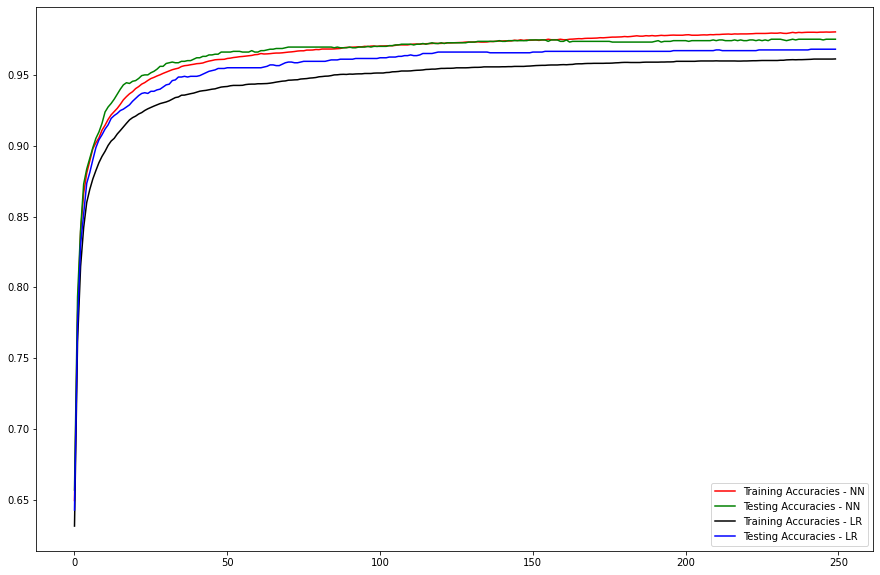

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

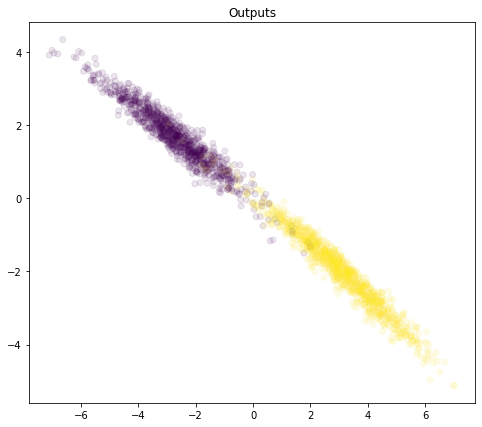

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

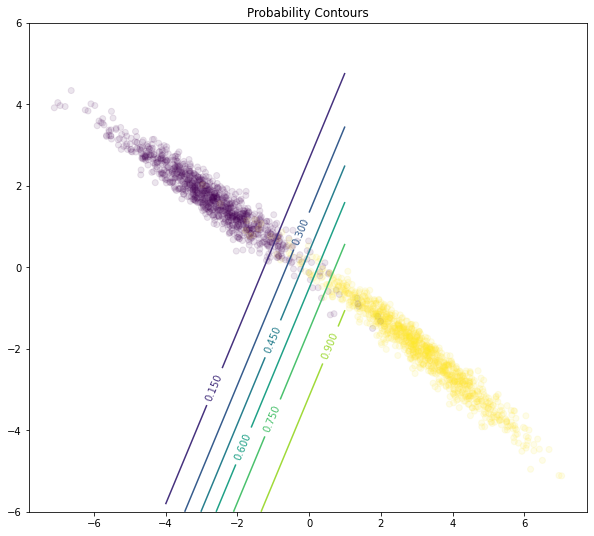

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );